# IMPORTING

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# LOAD DATA

In [3]:
df=pd.read_csv("transactions.csv")

In [5]:
df

,Customer_ID,Order_ID,Order_Date,Order_Amount
0,C001,O1001,2024-01-10,200
1,C001,O1002,2024-03-15,300
2,C002,O1003,2024-01-20,150
3,C002,O1004,2024-02-20,250
4,C003,O1005,2024-03-01,400
5,C004,O1006,2024-01-05,100
6,C004,O1007,2024-01-20,120
7,C004,O1008,2024-03-01,130
8,C005,O1009,2024-02-01,180
9,C005,O1010,2024-03-10,170


# EXPLORE DATA

In [67]:
df.columns

Index(['Customer_ID', 'Order_ID', 'Order_Date', 'Order_Amount'], dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer_ID   10 non-null     object        
 1   Order_ID      10 non-null     object        
 2   Order_Date    10 non-null     datetime64[ns]
 3   Order_Amount  10 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 452.0+ bytes


In [61]:
df.head()

,Customer_ID,Order_ID,Order_Date,Order_Amount
0,C001,O1001,2024-01-10,200
1,C001,O1002,2024-03-15,300
2,C002,O1003,2024-01-20,150
3,C002,O1004,2024-02-20,250
4,C003,O1005,2024-03-01,400


In [63]:
df.tail()

,Customer_ID,Order_ID,Order_Date,Order_Amount
5,C004,O1006,2024-01-05,100
6,C004,O1007,2024-01-20,120
7,C004,O1008,2024-03-01,130
8,C005,O1009,2024-02-01,180
9,C005,O1010,2024-03-10,170


In [65]:
df.sample()

,Customer_ID,Order_ID,Order_Date,Order_Amount
6,C004,O1007,2024-01-20,120


# PRE PROCESSING

In [73]:
df.isnull()

,Customer_ID,Order_ID,Order_Date,Order_Amount
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [75]:
df.isnull().sum()

Customer_ID     0
Order_ID        0
Order_Date      0
Order_Amount    0
dtype: int64

In [77]:
df.notnull()

,Customer_ID,Order_ID,Order_Date,Order_Amount
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [79]:
df.notnull().sum()

Customer_ID     10
Order_ID        10
Order_Date      10
Order_Amount    10
dtype: int64

In [81]:
df.describe()

,Order_Date,Order_Amount
count,10,10.000000
mean,2024-02-09 12:00:00,200.000000
min,2024-01-05 00:00:00,100.000000
25%,2024-01-20 00:00:00,135.000000
50%,2024-02-10 12:00:00,175.000000
75%,2024-03-01 00:00:00,237.500000
max,2024-03-15 00:00:00,400.000000
std,NaN,92.855922


In [83]:
df.describe(include='object')

,Customer_ID,Order_ID
count,10,10
unique,5,10
top,C004,O1001
freq,3,1


# VISUALIZATION

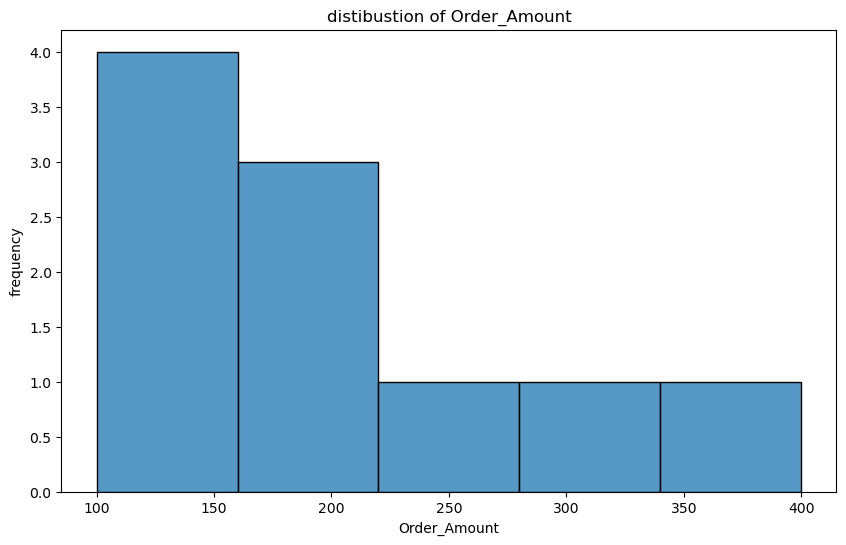

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(df['Order_Amount'])
plt.title("distibustion of Order_Amount")
plt.xlabel("Order_Amount")
plt.ylabel("frequency")
plt.show()

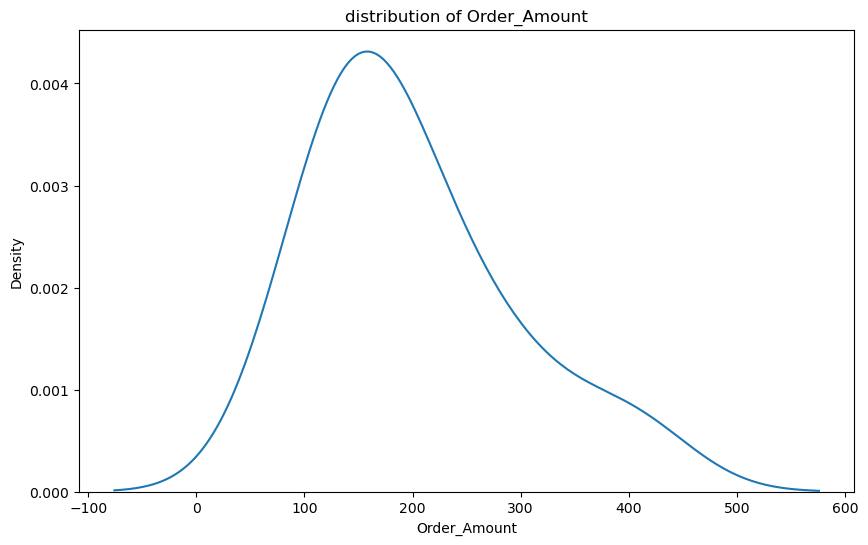

In [87]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Order_Amount'])
plt.title("distribution of Order_Amount")
plt.xlabel("Order_Amount")
plt.ylabel("Density")
plt.show()

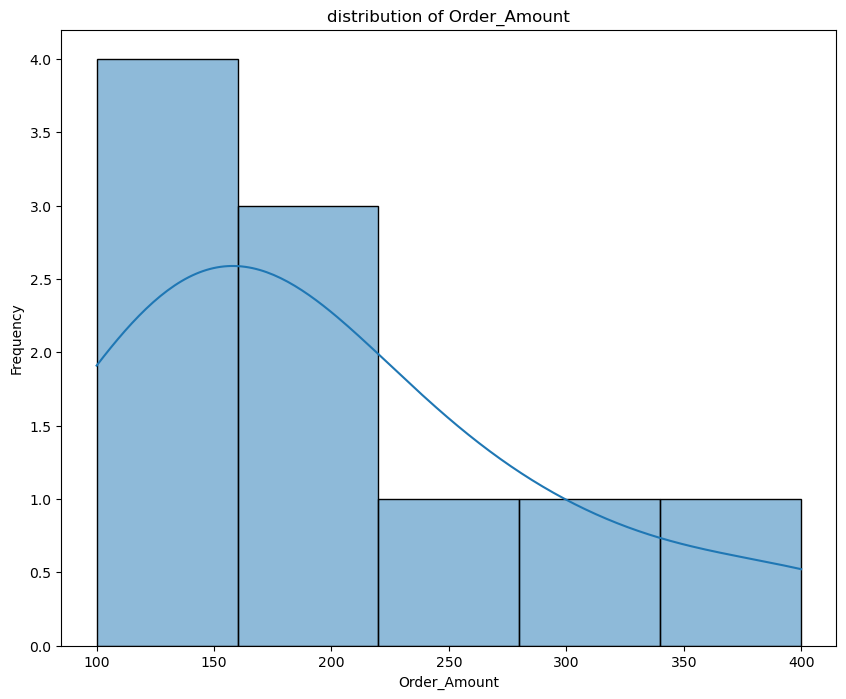

In [89]:
plt.figure(figsize=(10,8))
sns.histplot(df["Order_Amount"],kde=True)
plt.title("distribution of Order_Amount")
plt.xlabel("Order_Amount")
plt.ylabel("Frequency")
plt.show()

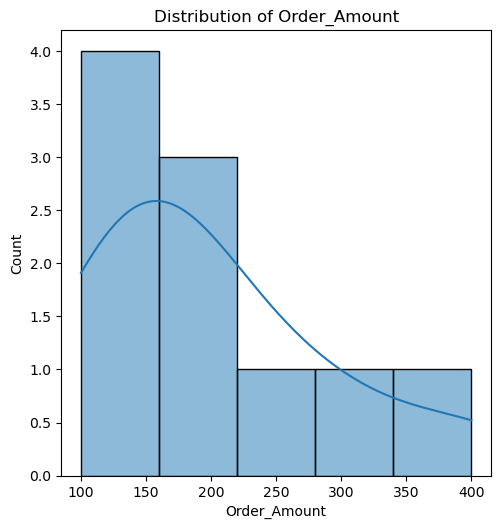

In [91]:
numerical_columns = ['Order_Amount']
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for the subplots
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

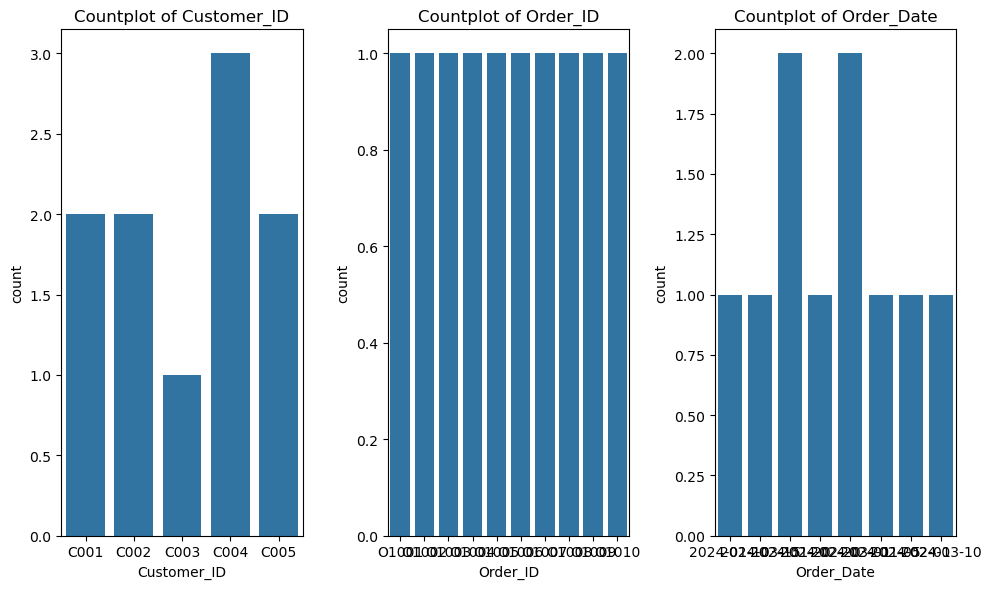

In [93]:
categorical_columns = ['Customer_ID','Order_ID','Order_Date']

plt.figure(figsize=(10, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns for the subplots
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.tight_layout()
plt.show()

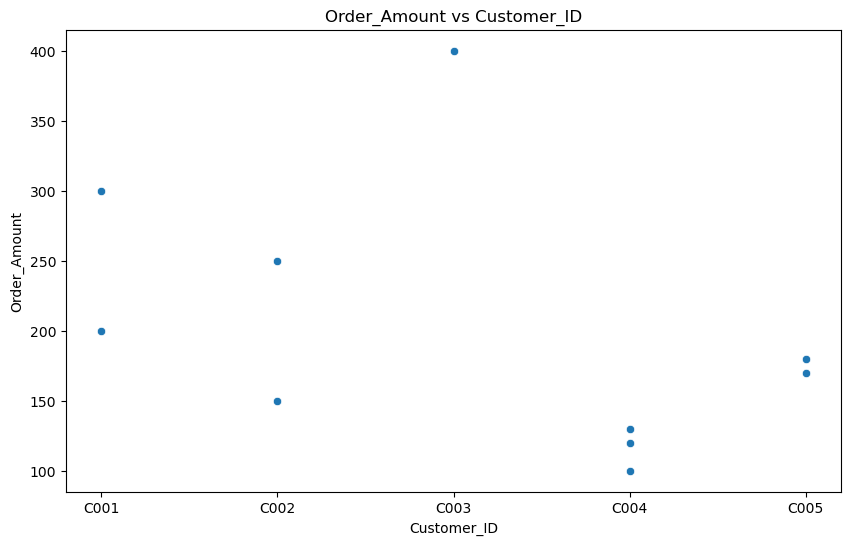

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Customer_ID'], y=df['Order_Amount'])
plt.title('Order_Amount vs Customer_ID')
plt.xlabel('Customer_ID')
plt.ylabel('Order_Amount')
plt.show()

<Axes: xlabel='Customer_ID', ylabel='Order_Amount'>

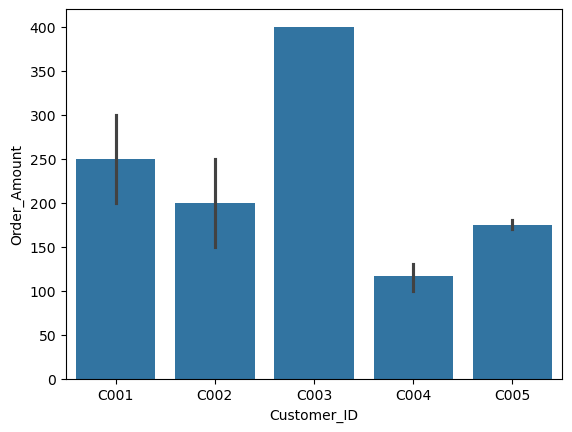

In [98]:
sns.barplot(data=df,x="Customer_ID",y="Order_Amount")

In [7]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [17]:
customer_data = df.groupby("Customer_ID").agg(
    Total_Spent=("Order_Amount", "sum"),
    Total_Orders=("Order_ID", "count"),
    First_Purchase=("Order_Date", "min"),
    Last_Purchase=("Order_Date", "max")
).reset_index()

In [19]:
customer_data

,Customer_ID,Total_Spent,Total_Orders,First_Purchase,Last_Purchase
0,C001,500,2,2024-01-10,2024-03-15
1,C002,400,2,2024-01-20,2024-02-20
2,C003,400,1,2024-03-01,2024-03-01
3,C004,350,3,2024-01-05,2024-03-01
4,C005,350,2,2024-02-01,2024-03-10


# FEATURE ENGINEERING

In [21]:
customer_data["Recency"] = (pd.Timestamp("2025-05-19") - customer_data["Last_Purchase"]).dt.days
customer_data["Tenure"] = (customer_data["Last_Purchase"] - customer_data["First_Purchase"]).dt.days
customer_data["AOV"] = customer_data["Total_Spent"] / customer_data["Total_Orders"]

In [23]:
customer_data

,Customer_ID,Total_Spent,Total_Orders,First_Purchase,Last_Purchase,Recency,Tenure,AOV
0,C001,500,2,2024-01-10,2024-03-15,430,65,250.000000
1,C002,400,2,2024-01-20,2024-02-20,454,31,200.000000
2,C003,400,1,2024-03-01,2024-03-01,444,0,400.000000
3,C004,350,3,2024-01-05,2024-03-01,444,56,116.666667
4,C005,350,2,2024-02-01,2024-03-10,435,38,175.000000


In [25]:
X = customer_data[["Total_Orders", "Recency", "Tenure", "AOV"]]
y = customer_data["Total_Spent"]

# SPLIT DATA

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
print(f"X_train samples: {X_train.shape[0]}")
print(f"y_train samples: {y_train.shape[0]}")


X_train samples: 4
y_train samples: 4


In [153]:
print(f"X_test samples: {X_train.shape[0]}")
print(f"y_test samples: {y_train.shape[0]}")


X_test samples: 4
y_test samples: 4


In [155]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(4, 4)
(1, 4)
(4,)
(1, 4)


# TRAIN THE MODEL

In [157]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))


In [159]:
print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")


Linear Regression - MAE: 73.16795356754693, RMSE: 73.16795356754693


In [161]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [163]:
print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")

Random Forest - MAE: 34.0, RMSE: 34.0


# XGBoost Evaluate

In [165]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))


In [167]:
print(f"XGBoost - MAE: {mae_xgb}, RMSE: {rmse_xgb}")

XGBoost - MAE: 49.999542236328125, RMSE: 49.999542236328125


# Predict LTV

In [169]:
customer_data["Predicted_LTV"] = xgb_model.predict(X)

# Define segments
customer_data["Segment"] = pd.cut(customer_data["Predicted_LTV"],
                                  bins=[0, 300, 600, float("inf")],
                                  labels=["Low", "Medium", "High"])

print(customer_data[["Customer_ID", "Predicted_LTV", "Segment"]])

  Customer_ID  Predicted_LTV Segment
0        C001     499.998810  Medium
1        C002     350.000458  Medium
2        C003     400.000031  Medium
3        C004     350.000458  Medium
4        C005     350.000458  Medium


# PLOTING

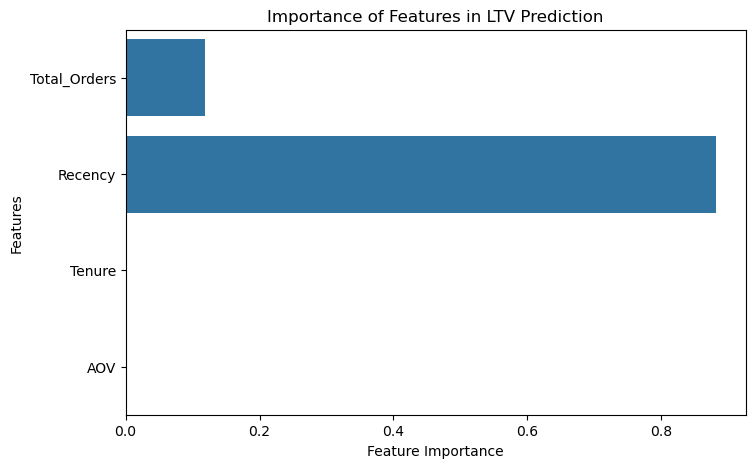

In [181]:
plt.figure(figsize=(8, 5))
sns.barplot(x= xgb_model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Importance of Features in LTV Prediction")
plt.show()

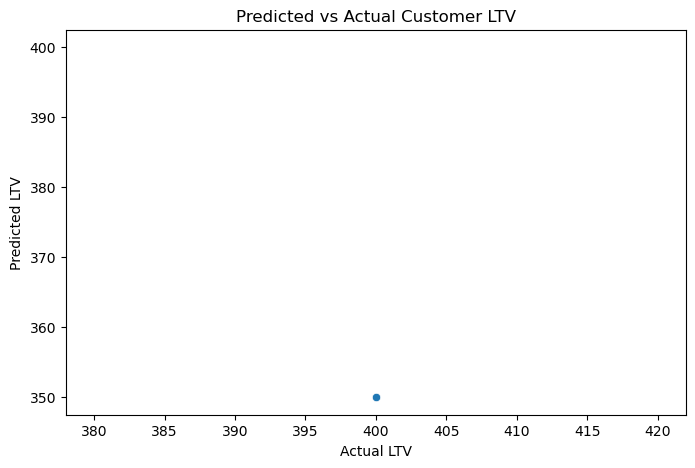

In [185]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal predictions line
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Predicted vs Actual Customer LTV")
plt.show()